#### Dataset
Flamia Azevedo, B., Pacheco, M., P. Fernandes, F., & Pereira, A. (2024). Dataset for Assessing Mathematics Learning in Higher Education [Dataset]. UCI Machine Learning Repository. https://doi.org/10.34620/dadosipb/PW3OWY.
#### Focus Question
Classification Problem: How can we use students' country, question level, math topic and subtopic to predict the correctness of the response?

## 1. Import and Read Data

In [3]:
import pandas as pd

In [4]:
# Read the data (clarify the separation, and encode using ISO-8859-1)
MathE = pd.read_csv('/Users/mac/Downloads/MathE_dataset.csv', sep=';', encoding='ISO-8859-1')
MathE.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [5]:
MathE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


## 2. Data Cleaning

In [7]:
# Check for missing values
missing_values = MathE.isnull().sum()
print(f'Missing Values:\n{missing_values}\n')

Missing Values:
Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64



#### There is no missing data in the dataset.

In [9]:
# Filter for only relevant characteristics
## Because the focus question is to predict the correctness of certain question topics, “Student ID” and specific ”Question ID“ and ”Keywords“ are not necessary.
MathE = MathE[['Student Country', 'Question Level', 'Topic', 'Subtopic', 'Type of Answer']] # 1 --> correct, 0 --> wrong
MathE.head()

,Student Country,Question Level,Topic,Subtopic,Type of Answer
0,Ireland,Basic,Statistics,Statistics,0
1,Portugal,Basic,Statistics,Statistics,1
2,Portugal,Basic,Statistics,Statistics,1
3,Italy,Basic,Statistics,Statistics,0
4,Portugal,Basic,Statistics,Statistics,1


## 3. Data Visualization and Analysis

In [11]:
# Counts the sample number from each country
country_counts = MathE['Student Country'].value_counts().reset_index()
country_counts.columns = ['Student Country', 'Number of Samples']
country_counts

,Student Country,Number of Samples
0,Portugal,5495
1,Lithuania,1443
2,Italy,1358
3,Slovenia,755
4,Ireland,300
5,Russian Federation,107
6,Romania,60
7,Spain,28


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

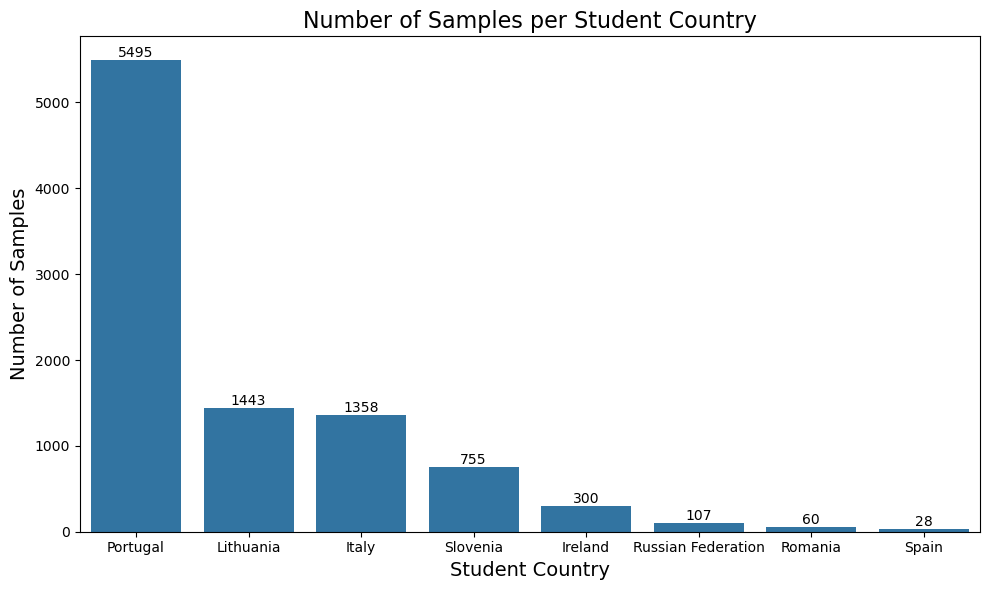

In [13]:
# Visualize the distribution of student country using a bar graph
plt.figure(figsize=(10, 6))
country_plot = sns.barplot(x='Student Country', y='Number of Samples', data=country_counts)

plt.title('Number of Samples per Student Country', fontsize=16)
plt.xlabel('Student Country', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)

# show data for each bar
for p in country_plot.patches:
    country_plot.annotate(int(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')
plt.tight_layout()
plt.show()

In [14]:
# Finds the number of question for each topic
topic_counts = MathE['Topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Number of Questions']
topic_counts

,Topic,Number of Questions
0,Linear Algebra,5726
1,Fundamental Mathematics,818
2,Complex Numbers,592
3,Differentiation,579
4,Analytic Geometry,358
5,Statistics,340
6,Numerical Methods,310
7,Optimization,182
8,Real Functions of a single variable,164
9,Integration,144


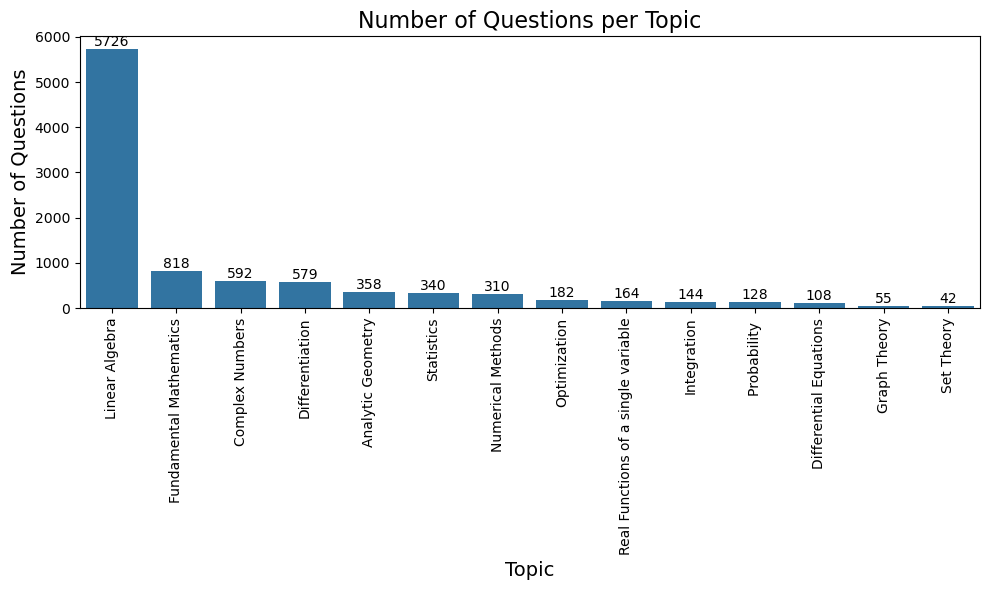

In [15]:
# Visualize the distribution of question topic using a bar graph
plt.figure(figsize=(10, 6))
topic_plot = sns.barplot(x='Topic', y='Number of Questions', data=topic_counts)

plt.title('Number of Questions per Topic', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
# show data for each bar
for p in topic_plot.patches:
    topic_plot.annotate(int(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
# Finds the number of question for each subtopic
subtopic_counts = MathE.groupby(['Topic', 'Subtopic']).size().reset_index(name='Number of Questions')
subtopic_counts

,Topic,Subtopic,Number of Questions
0,Analytic Geometry,Analytic Geometry,358
1,Complex Numbers,Complex Numbers,592
2,Differential Equations,Differential Equations,108
3,Differentiation,Derivatives,317
4,Differentiation,Partial Differentiation,262
5,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...",496
6,Fundamental Mathematics,Elementary Geometry,322
7,Graph Theory,Graph Theory,55
8,Integration,Definite Integrals,15
9,Integration,Double Integration,18


## 4. Remove Insignificant Data

In [18]:
# Because the sample from the three countries are too small and could possibly cause noise to the model, I decided to not use the data.
countries_to_remove = ['Spain', 'Russian Federation', 'Romania']
MathE = MathE[~MathE['Student Country'].isin(countries_to_remove)]
MathE.shape

(9351, 5)

In [19]:
# Because there are too many topics and affiliated subtopics which are not all valuable for the prediction of model, 
# I decided to only keep the five topics with a significant amout of samples (number of question > 300) and the subtopics they included.
topics_to_keep = ['Linear Algebra','Fundamental Mathematics','Differentiation','Analytic Geometry','Complex Numbers','Statistics','Numerical Methods']
MathE = MathE[MathE['Topic'].isin(topics_to_keep)]
MathE.shape

(8544, 5)

In [20]:
# Categorical data: print the number of categories and all unique categories for each variable
## To make sure all categorials are unique and as expected
categorical_columns = ['Student Country', 'Question Level', 'Topic', 'Subtopic']
for column in categorical_columns:
    print(f"Unique values for '{column}':")
    print(MathE[column].unique())
    print(f'Number of categories: {len(MathE[column].unique())}')
    print()

Unique values for 'Student Country':
['Ireland' 'Portugal' 'Italy' 'Lithuania' 'Slovenia']
Number of categories: 5

Unique values for 'Question Level':
['Basic' 'Advanced']
Number of categories: 2

Unique values for 'Topic':
['Statistics' 'Differentiation' 'Linear Algebra' 'Fundamental Mathematics'
 'Complex Numbers' 'Analytic Geometry' 'Numerical Methods']
Number of categories: 7

Unique values for 'Subtopic':
['Statistics' 'Derivatives' 'Linear Systems'
 'Algebraic expressions, Equations, and Inequalities'
 'Matrices and Determinants' 'Partial Differentiation'
 'Linear Transformations' 'Vector Spaces' 'Complex Numbers'
 'Elementary Geometry' 'Analytic Geometry' 'Eigenvalues and Eigenvectors'
 'Numerical Methods']
Number of categories: 13



## 5. Feature Encoding

In [22]:
## Because classification models require numerical inputs, it is necessary to encode categorical values into numerical values
### Use mapping fuction to manually encode 'Question Level' to number 0 and 1 in place
MathE['Question Level'] = MathE['Question Level'].map({'Basic': 0, 'Advanced': 1})
MathE.head()

,Student Country,Question Level,Topic,Subtopic,Type of Answer
0,Ireland,0,Statistics,Statistics,0
1,Portugal,0,Statistics,Statistics,1
2,Portugal,0,Statistics,Statistics,1
3,Italy,0,Statistics,Statistics,0
4,Portugal,0,Statistics,Statistics,1


In [23]:
### Use One-hot encoding for 'Student Country' 'Topic' and 'Subtopic'
MathE = pd.get_dummies(MathE, columns=['Student Country', 'Topic', 'Subtopic'])
MathE.head()

,Question Level,Type of Answer,Student Country_Ireland,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Slovenia,Topic_Analytic Geometry,Topic_Complex Numbers,Topic_Differentiation,...,Subtopic_Derivatives,Subtopic_Eigenvalues and Eigenvectors,Subtopic_Elementary Geometry,Subtopic_Linear Systems,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Statistics,Subtopic_Vector Spaces
0,0,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## 6. Built the Model

In [25]:
# Assign X and Y variables
X = MathE.drop(columns=['Type of Answer']) # All features: student country, question level, topic, subtopic
Y = MathE['Type of Answer'] # Target variable: answer right or wrong
X.shape, Y.shape

((8544, 26), (8544,))

In [26]:
# Split data into train and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6835, 26), (1709, 26))

In [27]:
# Use a random forest model because it could process multiple features, especially for a nonlinear relationship.
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

## 7. Results and Evaluation

In [29]:
# Get the importance rank of features
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
5,Student Country_Slovenia,0.205013
0,Question Level,0.128850
2,Student Country_Italy,0.073648
4,Student Country_Portugal,0.071936
3,Student Country_Lithuania,0.068712
18,Subtopic_Elementary Geometry,0.045870
19,Subtopic_Linear Systems,0.043496
25,Subtopic_Vector Spaces,0.042993
8,Topic_Differentiation,0.038837
1,Student Country_Ireland,0.033267


In [30]:
# Get the classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.71      0.65       871
           1       0.62      0.49      0.55       838

    accuracy                           0.61      1709
   macro avg       0.61      0.60      0.60      1709
weighted avg       0.61      0.61      0.60      1709



In [31]:
# Get the accuracy score
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")

Accuracy: 0.61
